# Numerical methods for evaluating integrals
In this notebook, we study numerical methods used to approximate integrals of the form:
$$I =  \int_a^bf(x) \,dx$$
for a certain function $f: [a,b] \to \mathbb{R}$ that we might find hard to compute by hand. We'll first try to understand the idea behind each method, we'll use each method to compute some integrals and we'll compare them in many aspects.

## Source
The problems and ideas explored in this notebook are inspired by educational materials from Sorbonne University: Programmation Python pour les mathématiques, Julien Guillod -- Sorbonne Université, used for teaching Python and applied mathematics. All implementations and analyses are my own.

## Rectangle rule

The rectangle rule is based on the Riemann definition of a function integral.


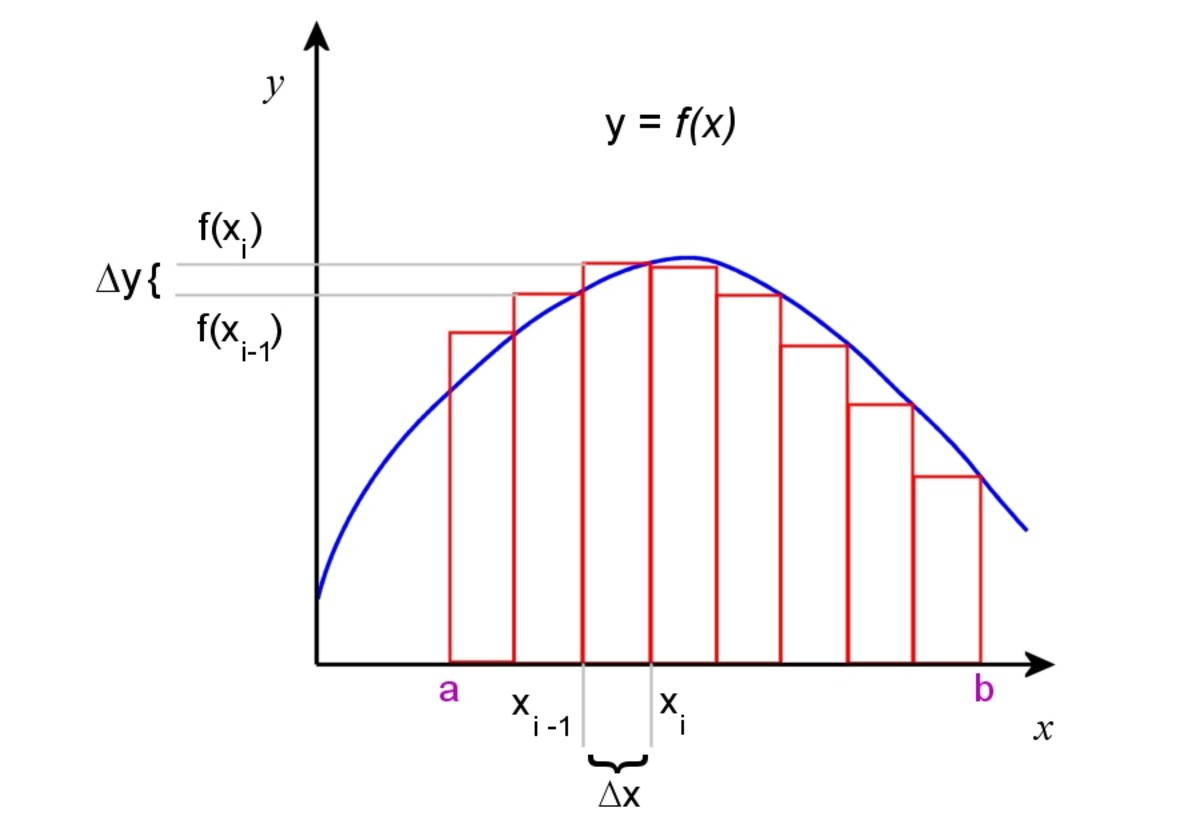

In [201]:
from IPython.display import Image, display

display(Image(filename="how-to-understand-calculus-a-beginners-guide-to-integration.jpg"))






First, we divide the interval [a,b] into N smaller intervals $[ x_n , x_{n+1}]$ of width $\delta = \frac{b-a}{N}$.

 Next, we suppose that the function is constant on each interval $[x_n, x_{n+1}]$. It means we are doing the following approximation:
$$ \int_{x_n}^{x_{n+1}}f(x) \,dx \approx \delta \times f( \tilde{x}_n)$$
where $\tilde{x}_n \in [x_n, x_{n+1}]$.

Then we approximate the integral by the sum within each interval as follows:
$$  I \approx \sum_{n = 0}^{N-1}\delta \times f( \tilde{x}_n)$$

If the function $f$ is $C^1[a,b]$, it's possible to show mathematically that the rectangle rule has a rate of convergence of order one. We say that a numerical method has a rate of convergence of order $k$ if the error between the approximation and the true value is of the order of $C \cdot N^{-k}$, where $C$ is a constant. We'll verify this empirically.

Let us start with the integral $\int_0^1 e^{-x} \,dx$. We know how to compute its value by hand:
$$\int_0^1 e^{-x} \,dx = [-e^{-x}]_0^1 = 1 - \frac{1}{e} \approx 0.632121$$

Let us define the function.





In [164]:
import numpy as np
def f1(x):
    return (np.exp(-x))

Next, we define the function rectangles($f$, $a$, $b$, $N$) that computes the approximation using the rectangle rule.

In [7]:
def rectangles(f,a,b,N):
    S = 0
    intervals = np.linspace(a,b,N+1)
    h = (b-a)/N
    for i in range(len(intervals)-1):
        S+= h * f(intervals[i])
    return S

We define the function plot_rectangles($f$, $a$, $b$, $N$) to visualize the approximation obtained with the rectangle rule.

In [48]:
import matplotlib.pyplot as plt
def plot_rectangles(f,a,b,N):
    intervals = np.linspace(a,b,N+1)
    fig,ax = plt.subplots()
    ax.plot(intervals, f(intervals) , color = 'red', label = 'The true function')
    ax.set_title(f"Approximation = {rectangles(f,a,b,N)} with N = {N}")
    ax.bar(intervals[:-1], f(intervals)[:-1] ,color= 'blue' ,width = (b-a)/N , align = 'edge', label = 'Approximation')
    ax.legend()   

Let us compute an approximation with $N = 20$.

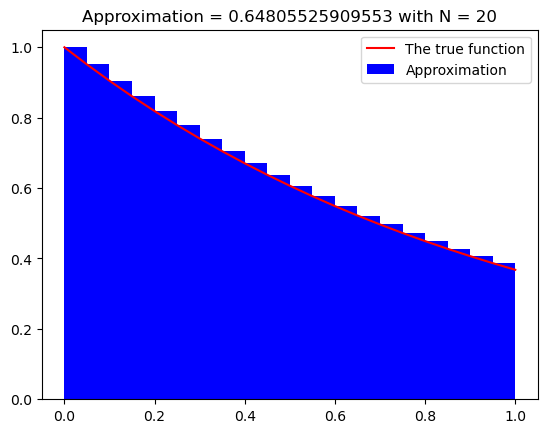

In [49]:
plot_rectangles(f1,0,1,20)

What about N = 100 ?

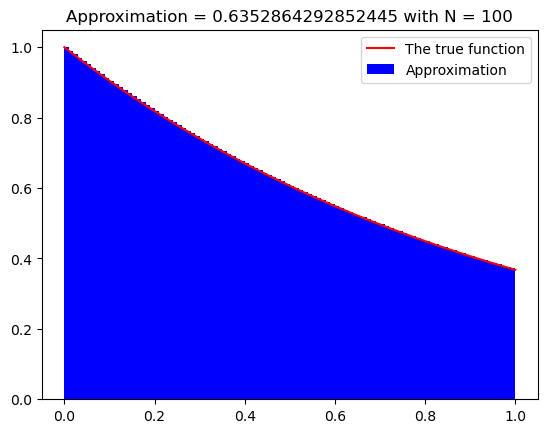

In [27]:
plot_rectangles(f1,0,1,100)

We can see that as we increase the number of subintervals $N$, the approximation becomes more accurate.

We mentioned earlier that the rectangle rule has a rate of convergence of order one; we will now verify this empirically.

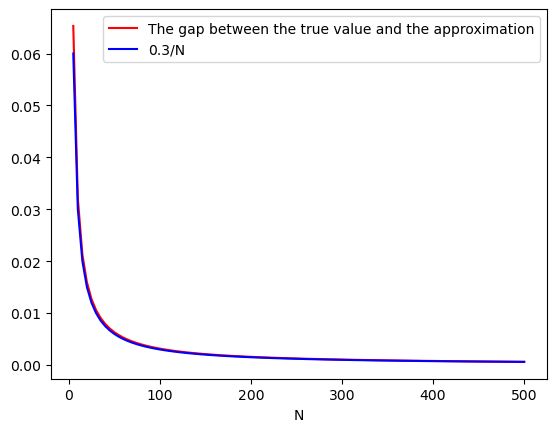

In [80]:
valueN = np.linspace(5,500,100)
approxs = []
convRate = []
for i in range(5,501,5) :
    approxs.append(rectangles(f,0,1,i))
    convRate.append(0.3/i)
approxs = np.array(approxs)
convRate = np.array(convRate)
diff = np.abs(np.abs(1- np.exp(-1) - approxs))
fig,ax = plt.subplots()
ax.plot(valueN, diff , color = 'red' , label = 'The gap between the true value and the approximation')
ax.plot(valueN, convRate ,  color = 'Blue' , label = '0.3/N')
ax.set_xlabel('N')
ax.legend()




Looking at the graph, we can see that the error between the true value of the integral and the approximation is approximately $\frac{0.3}{N}$.

This empirically demonstrates the rate of convergence of the rectangle rule.

## Trapezoidal rule

The trapezoidal rule is a numerical integration technique used to approximate the definite integral of a function by dividing the area under the curve into trapezoids.

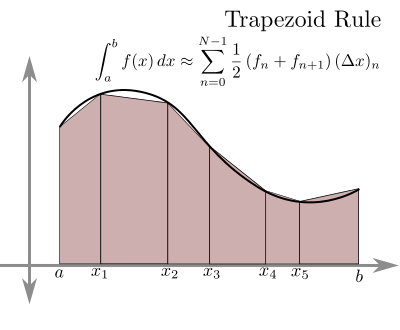

In [202]:

from IPython.display import Image, display

display(Image(filename="TrapezoidRule1.png"))

Knowing the formula for the area of a trapezoid, we make the following approximation:
$$\int_{x_n}^{x_{n+1}}f(x) \,dx \approx \delta \cdot \frac{f(x_n) + f(x_{n+1})}{2}$$

Let us define the function trapezes($f$, $a$, $b$, $N$) that computes the approximation of the integral using the trapezoidal rule.

In [43]:
def trapezes(f,a,b,N):
    S = 0
    intervals = np.linspace(a,b,N+1)
    values = f(intervals)
    h = (b-a)/N
    for i in range(N):
        S += h * (f(intervals[i])+f(intervals[i+1]))/2
    return S
    

Next, we define the function plot\_rapezoids($f$, $a$, $b$, $N$) to visualize the approximation obtained with the trapezoidal rule.

In [72]:
def plot_trapezes(f,a,b,N):
    intervals = np.linspace(a,b,N+1)
    values = f(intervals)
    fig,ax = plt.subplots()
    ax.plot(np.linspace(a,b,1000),f(np.linspace(a,b,1000)),color = 'red' , label = 'The true function')
    for i in range(N):
        if i == 0 :
            ax.fill( [intervals[i],intervals[i],intervals[i+1],intervals[i+1]],
             [0,values[i],values[i+1],0],alpha = 1,color = 'blue',label = 'Approximation'
                 )
        else : 
            ax.fill( [intervals[i],intervals[i],intervals[i+1],intervals[i+1]],
             [0,values[i],values[i+1],0],alpha = 1,color = 'blue'
                 )
    ax.set_title(f'Approximation = {trapezes(f,a,b,N)} with N = {N}')
            
    ax.set_xlabel('N')
    ax.legend()
    

We'll use this function to approximate the integral $\int_0^1 x^2 \,dx$.

We can easily compute its exact value analytically:
$$\int_0^1 x^2 \,dx = \left[ \frac{x^3}{3} \right]_0^1 = \frac{1}{3} \approx 0.33333$$

Let us first define the function whose integral we wish to approximate.


In [63]:
def f2(x):
    return x**2

Let us first compute an approximation with N = 5.

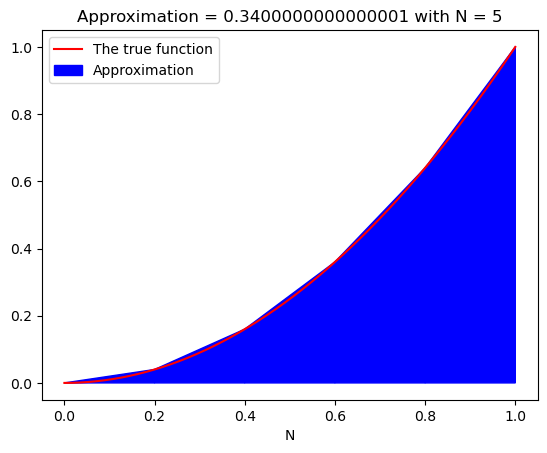

In [78]:
plot_trapezes(f2,0,1,5)

Let us see with N = 20.

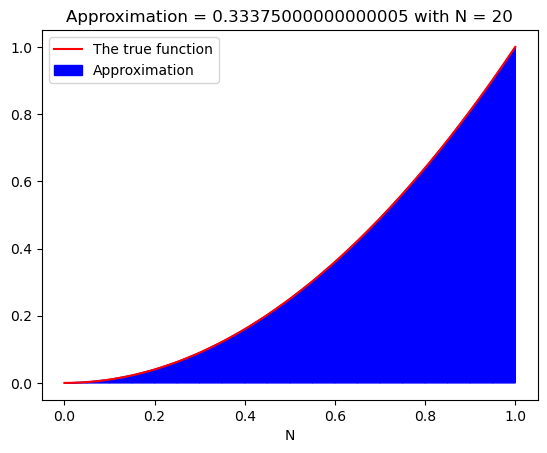

In [84]:
plot_trapezes(f2,0,1,20)

The trapezoidal rule converges faster than the rectangle rule. In fact, it is possible to show mathematically that it has a rate of convergence of order two. Let us verify this empirically.

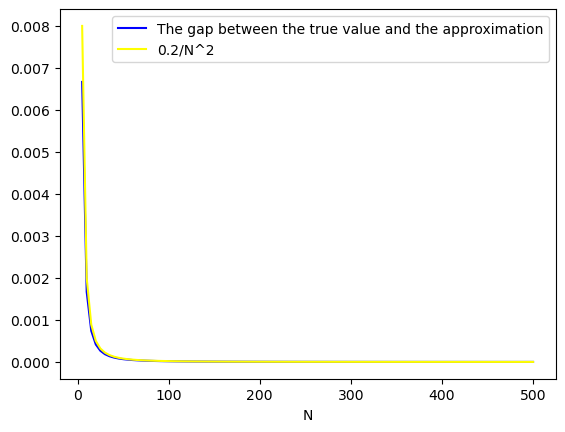

In [96]:
valueN2 = np.linspace(5,500,100)
approxs2 = []
convRate2 = []
for i in range(5,501,5) :
    approxs2.append(trapezes(f2,0,1,i))
    convRate2.append(0.2/(i**2))
approxs2 = np.array(approxs2)
convRate2 = np.array(convRate2)
diff2 = np.abs(np.abs(1/3 - approxs2))
fig,ax = plt.subplots()
ax.plot(valueN2, diff2 , color = 'blue' , label = 'The gap between the true value and the approximation')
ax.plot(valueN2, convRate2 ,  color = 'yellow' , label = '0.2/N^2')
ax.set_xlabel('N')
ax.legend()

We can see that the error between the true value of the integral and our approximation is approximately $\frac{0.2}{N^2}$.

This empirically confirms that the trapezoidal rule has a rate of convergence of order $2$.

## Monte Carlo method

The name of this method comes from a casino in Monaco of the same name. This is because it uses a probabilistic approach to approximate integrals (mathematicians Stanislaw Ulam and John von Neumann drew an analogy with games of chance).

The idea is that an integral can be interpreted as the expected value of a random variable $X$ ($X \sim \mathbb{U}[a,b]$):
$$\int_a^b f(x) \,dx = (b-a) \cdot \mathbb{E}[f(X)]$$

By the Law of Large Numbers, we can approximate this integral as follows:
$$\int_a^b f(x) \,dx \approx \frac{b-a}{N} \cdot \sum_{i=0}^{N-1} f(x_i)$$
where the $x_i$ are drawn from a uniform distribution on the interval $[a,b]$.

There is also a geometric interpretation of this method. Consider a function $f$ whose integral we wish to compute over $[a,b]$, and assume $0 \leq f(x) \leq y_{\text{max}}$ for all $x \in [a,b]$.

- First, randomly select points in the domain $[a,b] \times [0,y_{\text{max}}]$ such that every point has equal probability of being selected. That is, sample points $(x,y)$ where $x \sim \mathbb{U}[a,b]$ and $y \sim \mathbb{U}[0,y_{\text{max}}]$.
- Second, compute the proportion of points falling below the curve of $f$.
- Then, the approximation is given by:
    
    $\frac{\text{area under the curve}}{\text{total area}} \approx \text{proportion}$
    
    
    $\Leftrightarrow \text{area under the curve} \approx \text{total area} \times \text{proportion} = (b-a) \times y_{\text{max}} \times \text{proportion}$
    

Once again, the Law of Large Numbers ensures that as the number of selected points increases, the approximation converges to the true integral value.







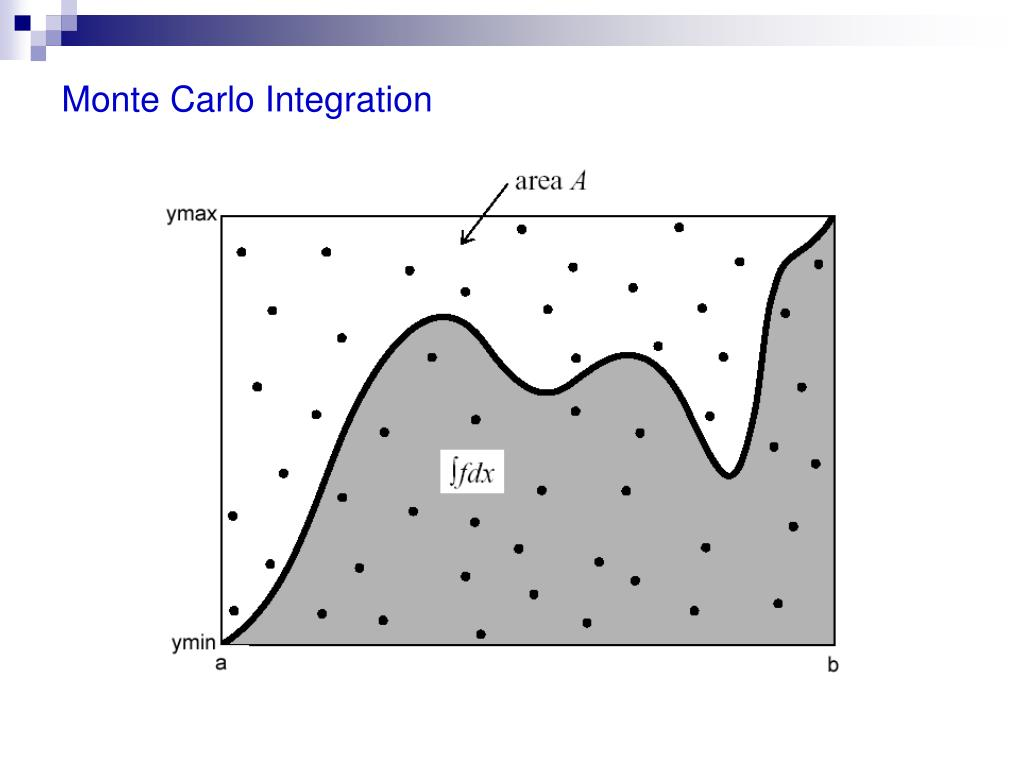

In [203]:
from IPython.display import Image, display

display(Image(filename="monte-carlo-integration19-l.jpg"))

Let us define the function monte\_carlo($f$, $a$, $b$, $N$) that computes an approximation of the integral of a function using the Monte Carlo method.

In [182]:
def montecarlo(f,a,b,N):
    X = np.random.uniform(a,b, size = (N,1))
    intervals = np.linspace(a,b,1000)
    values =  f(intervals)
    y_max = max(values)
    y_min = min(values)
    Y = np.random.uniform(0,y_max, size = (N,1))
    XY = np.concatenate((X,Y),axis=1)
    mask1 = Y <= f(X)     # shape (100,1)
    mask2 = Y > f(X) 
    XY1 = XY[mask1[:,0]]
    XY2 = XY[mask2[:,0]]
    integral = (b-a) *(y_max-0)* len(XY1[:,0])/N
    return integral

In [177]:
def plot_montecarlo(f,a,b,N):
    X = np.random.uniform(a,b, size = (N,1))
    intervals = np.linspace(a,b,1000)
    values =  f(intervals)
    y_max = max(values)
    y_min = min(values)
    Y = np.random.uniform(0,y_max, size = (N,1))
    XY = np.concatenate((X,Y),axis=1)
    mask1 = Y <= f(X)     # shape (100,1)
    mask2 = Y > f(X) 
    XY1 = XY[mask1[:,0]]
    XY2 = XY[mask2[:,0]]
    integral = (b-a) *(y_max-0)* len(XY1[:,0])/N
    fig , ax = plt.subplots()
    ax.plot(intervals,values,color = 'green' , label= 'The function')
    ax.scatter(XY1[:,0],XY1[:,1],color = 'red', label = 'Under the curve')
    ax.scatter(XY2[:,0],XY2[:,1],color = 'blue', label = 'Above the curve')
    ax.set_title(f'Approximation = {integral} with {N} selected points')
    ax.legend()
    
    
    

Let us approximate the integral $\int_0^1 e^{-x} \,dx$.

Its exact value can be computed analytically:
$$\int_0^1 e^{-x} \,dx = \left[ -e^{-x} \right]_0^1 = 1 - \frac{1}{e} \approx 0.63212$$

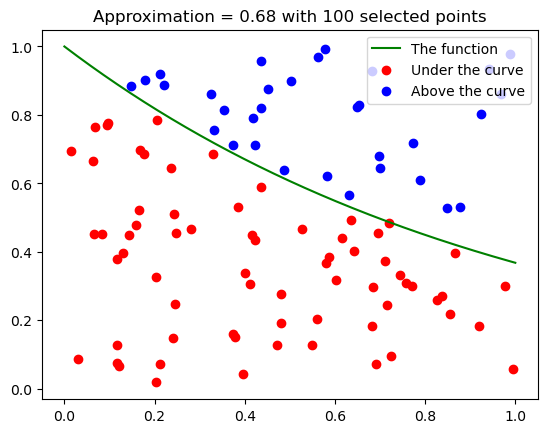

In [180]:
plot_montecarlo(f1,0,1,100)

Even with 100 sampled points, the approximation remains quite far from the true value.

What happens if we sample 10,000 points?


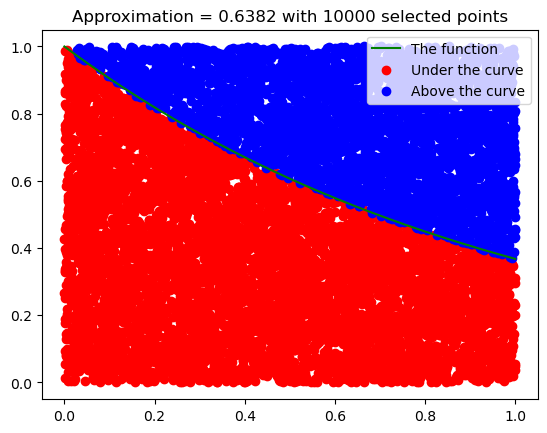

In [181]:
plot_montecarlo(f1,0,1,10000)

Now the approximation is more accurate.

We can see that the method converges toward the true value more slowly than the previous methods (the rectangle and trapezoidal rules). In fact, it is possible to show mathematically that it has a rate of convergence of order $\frac{1}2$. We will verify this empirically.

However, the advantage of this method is that its rate of convergence does not depend on the regularity of the function or the dimension (we are working in two dimensions here). In many circumstances, it performs better than the other methods.


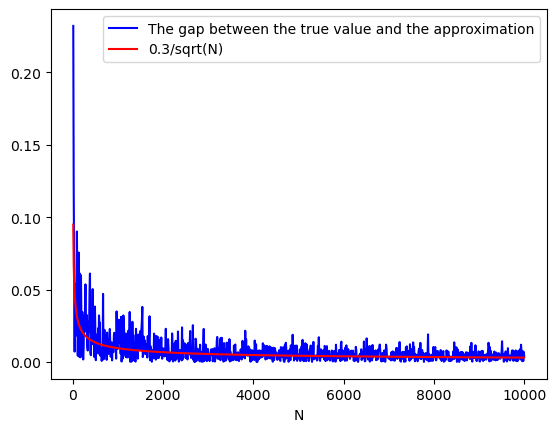

In [191]:
valueN3 = np.linspace(10,10000,1000)
approxs3 = []
convRate3 = []
for i in range(10,10001,10) :
    approxs3.append(montecarlo(f1,0,1,i))
    convRate3.append(0.3/(np.sqrt(i)))
approxs3 = np.array(approxs3)
convRate3 = np.array(convRate3)
diff3 = np.abs(np.abs(1-np.exp(-1) - approxs3))
fig,ax = plt.subplots()
ax.plot(valueN3, diff3 , color = 'blue' , label = 'The gap between the true value and the approximation')
ax.plot(valueN3, convRate3 ,  color = 'red' , label = '0.3/sqrt(N)')
ax.set_xlabel('N')
ax.legend()

We can see that the error between the true value of the integral and our approximation behaves like $\frac{0.3}{\sqrt{N}}$. This empirically validates that the Monte Carlo method has a rate of convergence of order $\frac{1}{2}$.

Now we are going to use the Monte Carlo method to approximate the value of $\pi$.

Consider a square of side length 1 containing a circle of radius $\frac{1}{2}$. The areas of the square and the circle are respectively $1$ and $\pi \cdot \left( \frac{1}{2} \right)^2 = \frac{\pi}{4}$.

If we randomly select a point within the square, the probability that it lies inside the circle equals the ratio of the two areas: $\frac{\frac{\pi}{4}}{1} = \frac{\pi}{4}$.

We will randomly select a large number of points in the square, compute the proportion of points falling inside the circle, and then multiply this proportion by 4 to obtain our approximation of $\pi$.



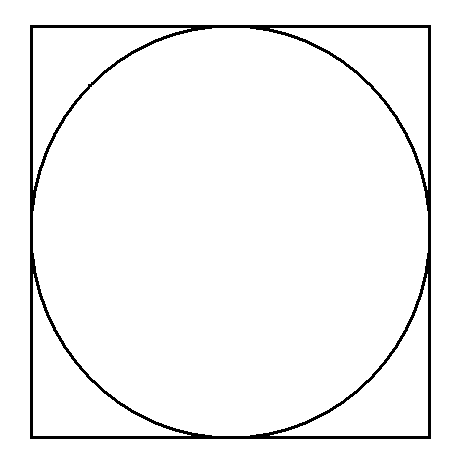

In [204]:
from IPython.display import Image, display

display(Image(filename="R.png"))


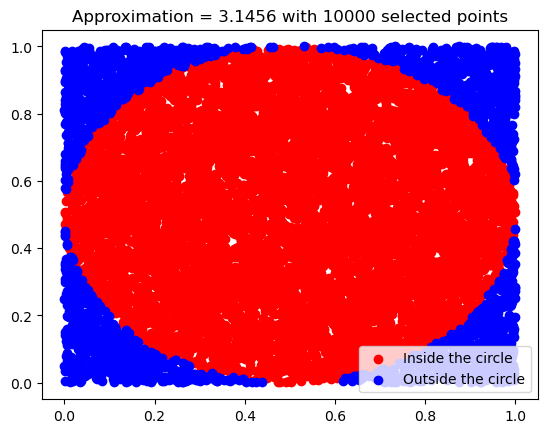

In [200]:
def approximate_pi(N):
    X_ = np.random.uniform(0,1, size = (N,1))
    Y_ = np.random.uniform(0,1, size = (N,1))
    XY_ = np.concatenate((X_,Y_), axis = 1)
    XY_2 = []
    XY_3 = []
    for i in range(N):
        if (XY_[i,0]- 1/2)**2 + (XY_[i,1]- 1/2)**2 <= 1/4:
            XY_2.append([XY_[i,0],XY_[i,1]])
        else :
            XY_3.append([XY_[i,0],XY_[i,1]])
    XY_2 = np.array(XY_2)
    XY_3 = np.array(XY_3)
    pi_approx = 4 * len(XY_2[:,0])/N
    fig,ax = plt.subplots()
    ax.scatter(XY_2[:,0],XY_2[:,1], color = 'red', label = 'Inside the circle')
    ax.scatter(XY_3[:,0],XY_3[:,1], color = 'blue', label = 'Outside the circle')
    ax.set_title( f'Approximation = {pi_approx} with {N} selected points')
    ax.legend()
approximate_pi(10000)


We obtained a reasonably accurate approximation with 10,000 sampled points.

One might wonder whether it is possible to obtain the exact value of $\pi$ using this approach.

Suppose this were possible; then the value of $\pi$ would be:
$$\pi = \frac{4 \cdot e}{n}$$
where $n$ is the total number of points in the square and $e$ is the number of points inside the circle.

This would imply that $\pi$ is a rational number, which is a contradiction. Hence, it is impossible to obtain the exact value of $\pi$ using this method with a finite number of samples.
